In [65]:
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


Xtr=np.loadtxt("TrainData.csv")
Ytr=np.loadtxt("TrainLabels.csv")
Xts=np.loadtxt("TestData.csv")


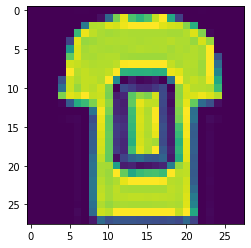

In [66]:
################ Plotting random shirt ############

import matplotlib.pyplot as plt
plt.imshow(Xtr[10].reshape([28,28]))

(514, 800, 3)
(128, 64, 3)


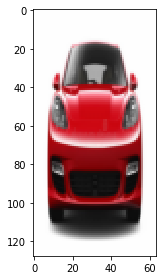

In [67]:
########### reading the image ########
img = imread('image.jpeg')
imshow(img)
print(img.shape)

######## resizing image #########

resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

####### creating hog features ######### 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

In [68]:
fd.shape

(3780,)

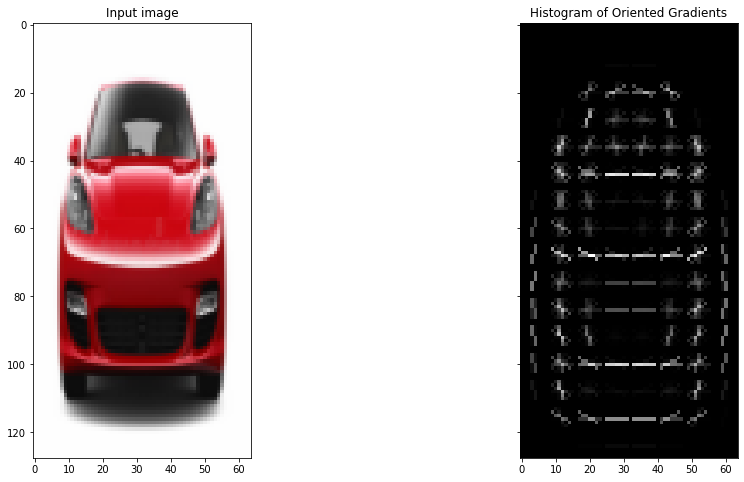

In [69]:
######### Taking random image and plotting histogram ################

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 
# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

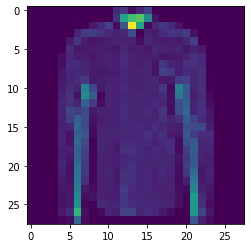

In [70]:
######## Plotting ########

plt.imshow(Xtr[2650].reshape([28,28]))

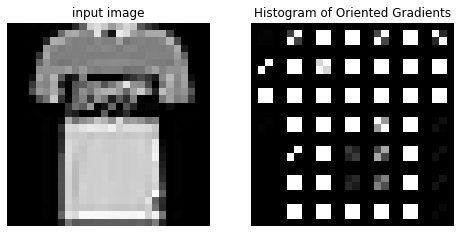

In [71]:
######### Taking random image and plotting histogram ########### 

image = Xtr[2000].reshape([28,28])

fd,hog_image= hog(image,orientations=8,pixels_per_cell=(4,4), 
                cells_per_block=(1,1),visualize=True,multichannel=None)

fd, (ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('input image')

#rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


In [72]:
######## Appending to list for Train_data ###########

list_fd=[]
for i in range(len(Xtr)):           
    list_fd.append(Xtr[i].reshape([28,28]))
    

In [73]:
########### Extracting hog features ############
train_list=[]
for i in list_fd:
    fd,hog_image= hog(i,orientations=8,pixels_per_cell=(4,4), 
                cells_per_block=(1,1),visualize=True,multichannel=None)
    train_list.append(fd)

In [74]:
############# Train_test_split ###############

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_list,Ytr,train_size= 0.85,test_size=0.15, random_state=101)

In [75]:
######## DecisionTreeClassifier ############
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=0)
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [76]:
################ Accuracy_prediction ############

from sklearn.metrics import accuracy_score
YModel=model_tree.predict(X_test)
accuracy_score(y_test,YModel)

0.6844444444444444

In [77]:
############# Gaussian Classifier ##########

from sklearn.naive_bayes import GaussianNB
model_gvc = GaussianNB()
model_gvc.fit(X_train,y_train)

GaussianNB()

In [78]:
################ Accuracy_prediction ############

from sklearn.metrics import accuracy_score
Ymodel=model_gvc.predict(X_test)
accuracy_score(y_test,YModel)

0.6844444444444444

In [79]:
############ SVC_Classifier ##########
from sklearn.svm import SVC
model_svc = SVC(kernel='linear', C=1)
model_svc.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [80]:
################ Accuracy_prediction ############

from sklearn.metrics import accuracy_score
YModel=model_svc.predict(X_test)
accuracy_score(y_test,YModel)

0.7877777777777778

In [81]:
######## Appneding to list from test_data #######
list_fd=[]
for i in range(len(Xts)):           
    list_fd.append(Xts[i].reshape([28,28]))


In [82]:
############# Extracting Hog features ##########
test_list=[]
for i in list_fd:
    fd,hog_image= hog(i,orientations=8,pixels_per_cell=(4,4), 
                cells_per_block=(1,1),visualize=True,multichannel=None)
    test_list.append(fd)

In [83]:
############# output array of test_labels ##############
csv=model_svc.predict(test_list)
csv

array([-1.,  1., -1., ...,  1., -1., -1.])

In [84]:
############## saving data of test labels in a csv ###########
import pandas as pd
csv=np.array(csv)
np.savetxt("Test_labels.csv", csv, delimiter=",")
